In [2]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt

## Config Directories

In [9]:
#BDD Annotation
bddRoot = 'BDD/BDD100K/labels/'

labelsBDDTrain = bddRoot+'bdd100k_labels_images_train.json'


In [10]:
f = open(labelsBDDTrain)
data = json.load(f)
len(data)

69863

In [29]:
dataItem = data[1]
dataItem

{'name': '0000f77c-62c2a288.jpg',
 'attributes': {'weather': 'clear',
  'scene': 'highway',
  'timeofday': 'dawn/dusk'},
 'timestamp': 10000,
 'labels': [{'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 250.549246,
    'y1': 294.619798,
    'x2': 308.085801,
    'y2': 357.05308},
   'id': 11},
  {'category': 'traffic sign',
   'attributes': {'occluded': True,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 206.478694,
    'y1': 299.516526,
    'x2': 221.16888,
    'y2': 321.551802},
   'id': 12},
  {'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 924.665474,
    'y1': 286.866651,
    'x2': 936.907294,
    'y2': 297.8

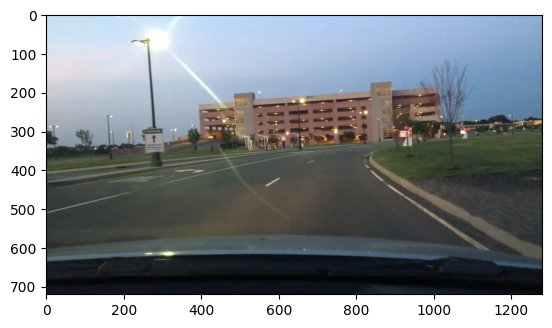

In [24]:
bddRootImage = 'BDD/BDD100K/images/100k/train/'
image = Image.open(bddRootImage+dataItem['name'])
plt.imshow(image)
# /home/duypd/ThisPC-DuyPC/Traffic-SceneGraph-Generation/Traffic-SceneGraph-Generation/Datasets/BDD/BDD100K/images/100k/train

{'x1': 250.549246, 'y1': 294.619798, 'x2': 308.085801, 'y2': 357.05308}
{'x1': 206.478694, 'y1': 299.516526, 'x2': 221.16888, 'y2': 321.551802}
{'x1': 924.665474, 'y1': 286.866651, 'x2': 936.907294, 'y2': 297.884289}
{'x1': 423.158909, 'y1': 336.241987, 'x2': 434.176547, 'y2': 358.277263}
{'x1': 563.939839, 'y1': 324.000165, 'x2': 573.733294, 'y2': 348.483804}
{'x1': 656.977672, 'y1': 315.838956, 'x2': 666.771127, 'y2': 345.219323}
[[370.582951, 571.471352], [620.13376, 409.263326], [726.192854, 364.34418], [823.517669, 336.893591], [843.481732, 350.618886], [733.679377, 383.060491], [994.459972, 506.588141], [1106.757835, 600.169695], [864.693551, 571.471352], [625.124775, 556.498302], [370.582951, 571.471352]]
[[351.86664, 572.719106], [500.349372, 484.12857], [612.647235, 381.812737], [790.821141, 343.961857], [512.826912, 378.069476], [259.532841, 455.430226], [0, 515.32242], [0, 600.397706], [119.788411, 581.971178], [242.631932, 574.293458], [351.86664, 572.719106]]
[[0, 506.5881

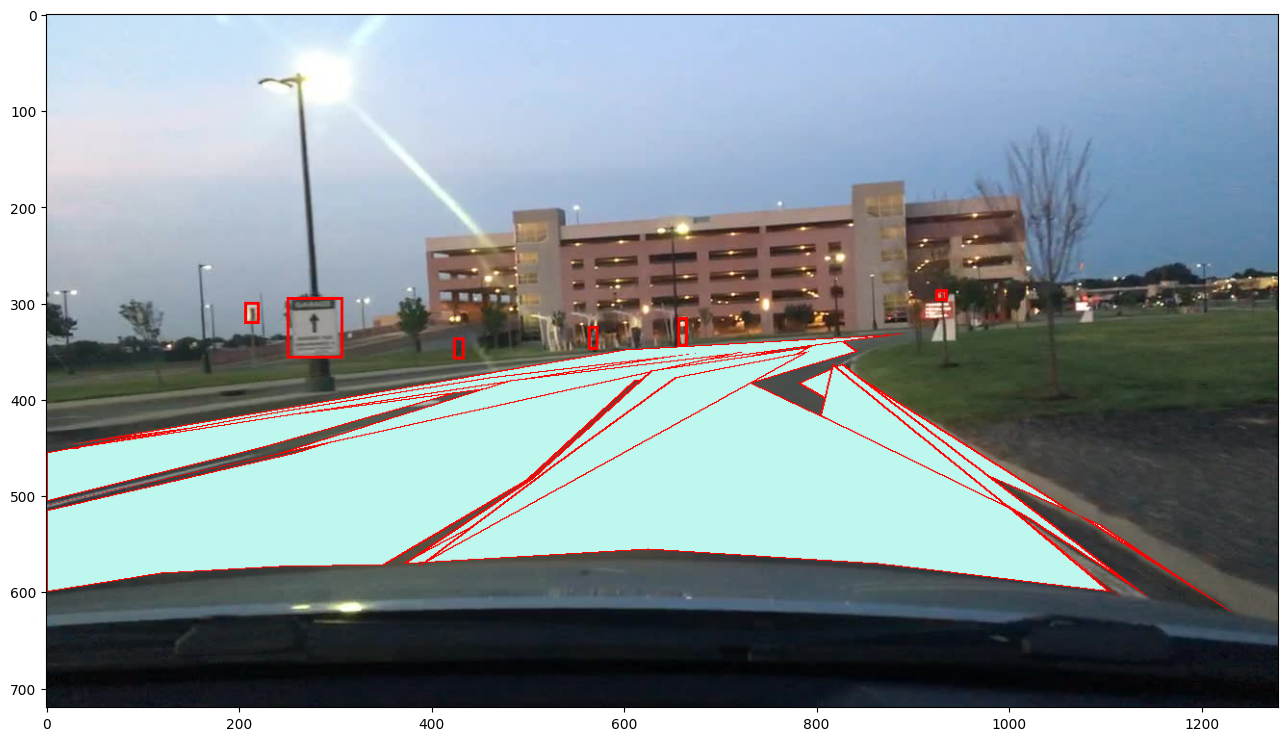

In [33]:
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in dataItem['labels']:
    if('box2d' in item.keys()):
        print(item['box2d'])
        x1, y1, x2, y2 = item['box2d']['x1'], item['box2d']['y1'], item['box2d']['x2'], item['box2d']['y2']
        
        imageDraw.rectangle([(x1, y1), (x2, y2)], outline ="red", width=3) 
    if('poly2d' in item.keys()):
        print(item['poly2d'][0]['vertices'])
        converted_list = [tuple(item) for item in item['poly2d'][0]['vertices']]
        poly2d = converted_list
        imageDraw.polygon(poly2d, outline ="red", fill="#BEF7ED", width=2) 
plt.figure(figsize=(16,9))
plt.imshow(imCopy)
        